Harel Test for DS-Liran Ben-Zion

In [0]:
#connect to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#load lib.
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings


In [0]:
#load data

Customers = pd.read_csv("/content/drive/My Drive/Harel/Customers.csv")
Polisot = pd.read_csv("/content/drive/My Drive/Harel/Polisot.csv")
Tviot = pd.read_csv("/content/drive/My Drive/Harel/Tviot.csv")

In [0]:
#data info

Customers.info()
print('_'*40)
Tviot.info()
print('_'*40)
Polisot.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
Unnamed: 0            8000 non-null int64
ID                    8000 non-null int64
Age                   8000 non-null int64
Gender                8000 non-null object
City                  8000 non-null object
Keypls                8000 non-null int64
Meshlem_polisa_IND    8000 non-null int64
dtypes: int64(5), object(2)
memory usage: 437.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 4 columns):
Unnamed: 0     711 non-null int64
Keypls         711 non-null int64
Tvia_number    711 non-null int64
Tvia_date      711 non-null object
dtypes: int64(3), object(1)
memory usage: 22.3+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 7 columns):
Unnamed: 0          4001 non-null int64
Keypls              4001 n

In [0]:
#convert features to categorical and DT

Customers['Gender'] = Customers['Gender'].astype('category')
Customers['City'] = Customers['City'].astype('category')
Customers['Meshlem_polisa_IND'] = Customers['Meshlem_polisa_IND'].astype('category')

Tviot['Tvia_date'] = pd.to_datetime(Tviot['Tvia_date'])

Polisot['Rechecv_Companny'] = Polisot['Rechecv_Companny'].astype('category')
Polisot['Start_date'] = pd.to_datetime(Polisot['Start_date'])
Polisot['End_date'] = pd.to_datetime(Polisot['End_date'])


In [0]:
Customers.head(5)

,Unnamed: 0,ID,Age,Gender,City,Keypls,Meshlem_polisa_IND
0,0,300600900,39,Male,Tel Aviv,2198,0
1,1,300600901,44,Male,Jerusalem,1152,0
2,2,300600902,43,Female,Tel Aviv,4990,0
3,3,300600903,57,Female,Jerusalem,1543,0
4,4,300600904,21,Male,Ashdod,3704,0


In [0]:
Polisot.head(5)

,Unnamed: 0,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Start_date,End_date
0,0,1000,73002500,Mazda,0,2016-09-03,2017-09-03
1,1,1001,73002501,Fiat,2006,2016-04-08,2017-04-08
2,2,1002,73002502,Mazda,2000,2016-11-11,2017-11-11
3,3,1003,73002503,Mazda,2010,2016-04-08,2017-04-08
4,4,1004,73002504,Fiat,2008,2016-01-01,2016-12-31


In [0]:
Tviot.head(5)

,Unnamed: 0,Keypls,Tvia_number,Tvia_date
0,2,1002,4,2016-11-11
1,4,1004,16,2016-11-29
2,20,1020,400,2016-05-02
3,33,1033,1089,2016-07-08
4,46,1046,2116,2016-06-24


In [0]:
#remove first col
Tviot=Tviot.drop(Tviot.columns[[0]], axis=1)
Customers=Customers.drop(Customers.columns[[0]], axis=1)
Polisot=Polisot.drop(Polisot.columns[[0]], axis=1)

In [0]:
# visualize missing values
import missingno as msno
import time
import pprint as pp
from termcolor import colored
import pandas as pd

In [0]:
#function for NA analysis

def nan_analysis(df, figure_size=(12, 5)):
    # nan ratio in each feature
    msno.bar(df, figsize=figure_size)
    time.sleep(0.2)
    # nan ratio in each row
    msno.matrix(df, figsize=figure_size)
    time.sleep(0.2)

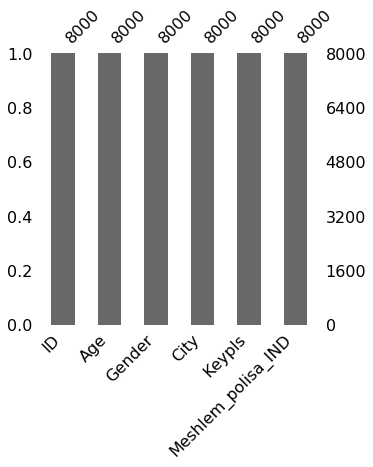

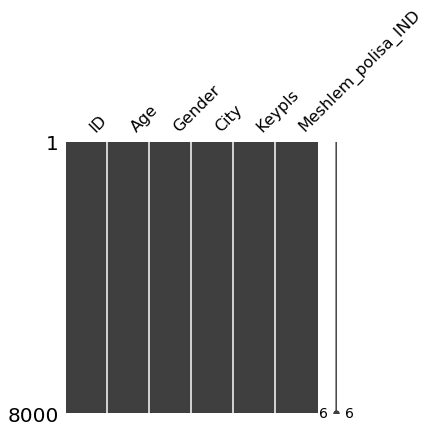

In [0]:
#bar-chart of the number of nans over features
#plot of nans over row. It also plots the number of not-nans over the rows.

nan_analysis(Customers, figure_size=(5,5))


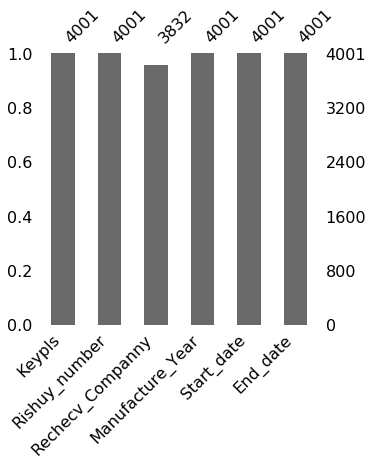

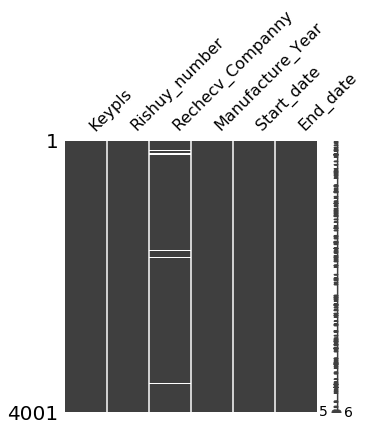

In [0]:
nan_analysis(Polisot, figure_size=(5,5))

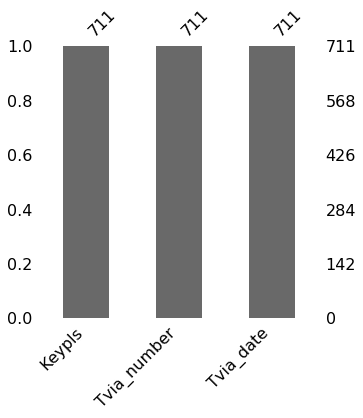

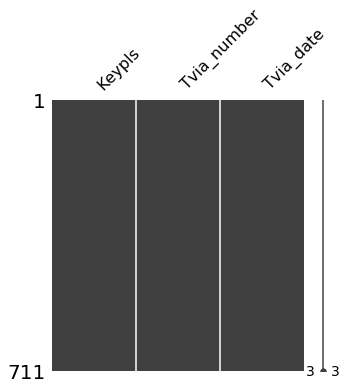

In [0]:
nan_analysis(Tviot, figure_size=(5,5 ))

In [0]:
#drop NA from table Polisot
Polisot=Polisot.dropna()

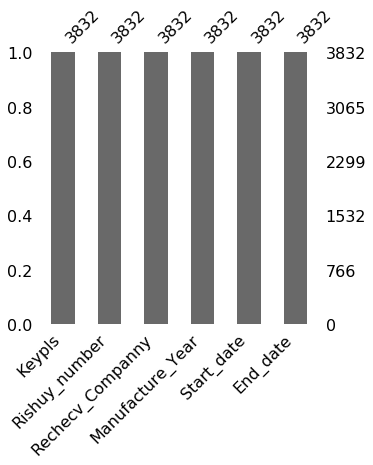

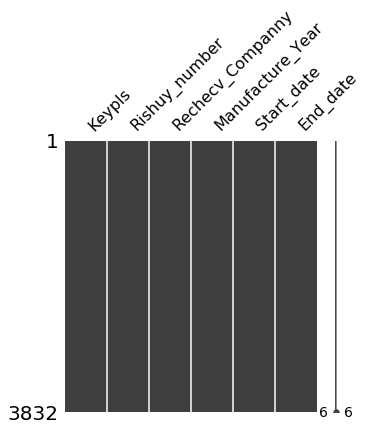

In [0]:
#after removing NA
nan_analysis(Polisot, figure_size=(5,5))

Work on Customers Table

Text(0.5, 1.0, 'Gender Distribution')

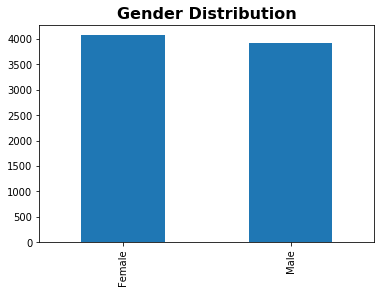

In [0]:
#Data Visualization
Customers['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution', weight='bold', fontsize=16)


Text(0.5, 1.0, 'Age Distribution')

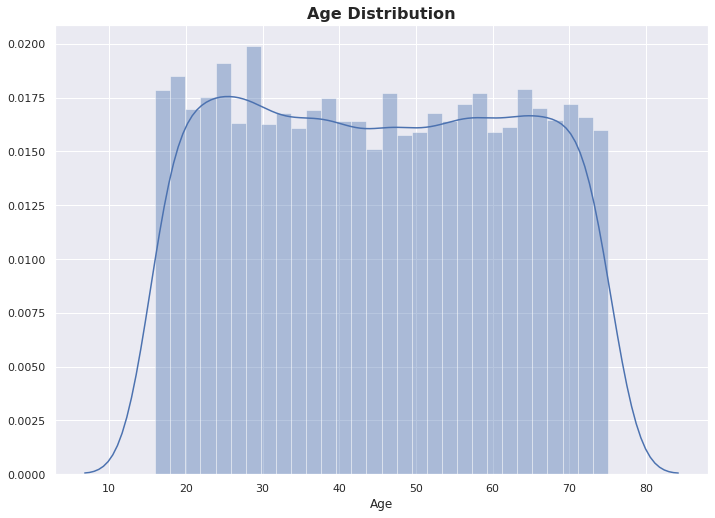

In [0]:
# plot a histogram showing the distribution of the target values

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Customers['Age'], bins=30)
plt.title('Age Distribution', weight='bold', fontsize=16)


Text(0.5, 1.0, 'Age Distribution By Gender')

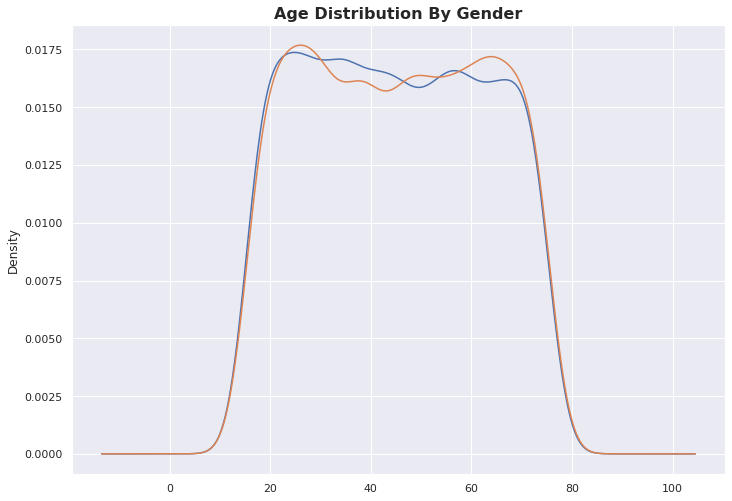

In [0]:
#plot 2:
Customers.groupby('Gender').Age.plot(kind='kde')
plt.title('Age Distribution By Gender', weight='bold', fontsize=16)



Text(0.5, 1.0, 'Meshlem_polisa_IND Distribution')

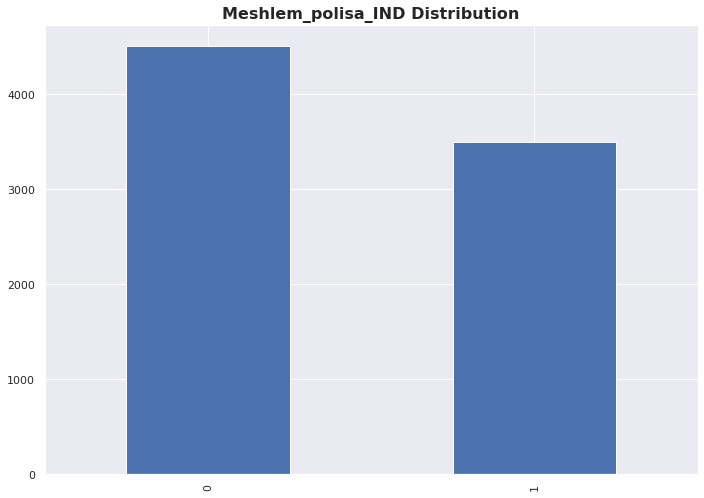

In [0]:
#plot 3:
Customers['Meshlem_polisa_IND'].value_counts().plot(kind='bar')
plt.title('Meshlem_polisa_IND Distribution', weight='bold', fontsize=16)


Text(0.5, 1.0, 'City Distribution')

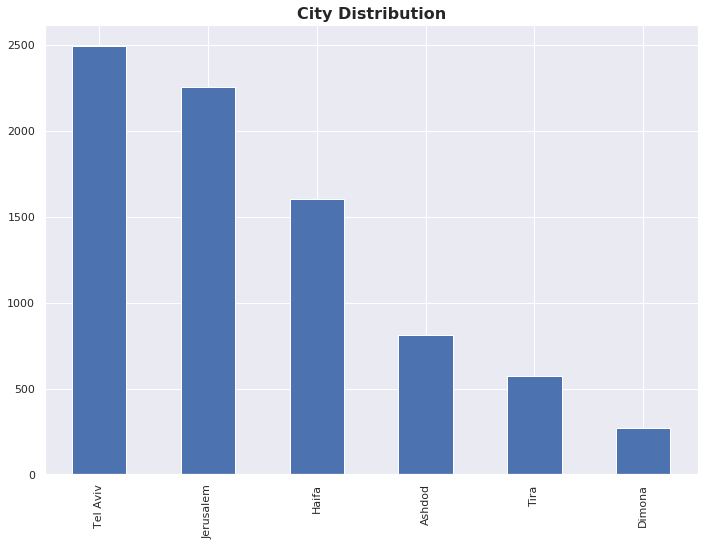

In [0]:
#plot 4:
Customers['City'].value_counts().plot(kind='bar')
plt.title('City Distribution', weight='bold', fontsize=16)


Text(0.5, 1.0, 'Age Density by City')

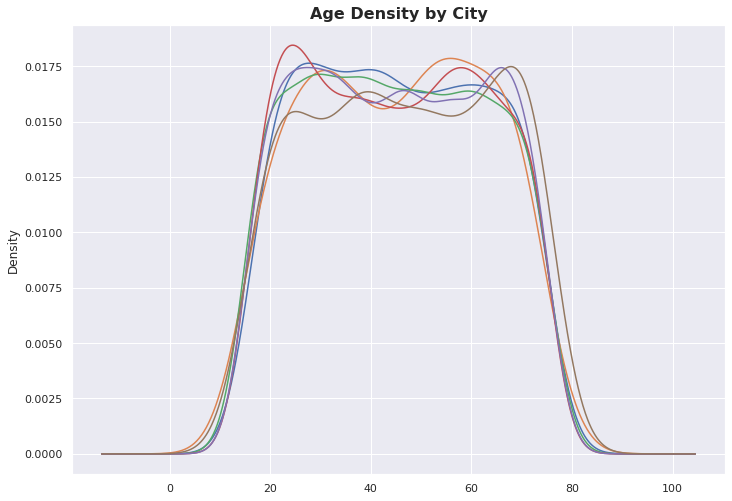

In [0]:
#plot 5:
Customers.groupby('City').Age.plot(kind='kde')
plt.title('Age Density by City', weight='bold', fontsize=16)

#plt.legend(ncol=2, loc='upper left')


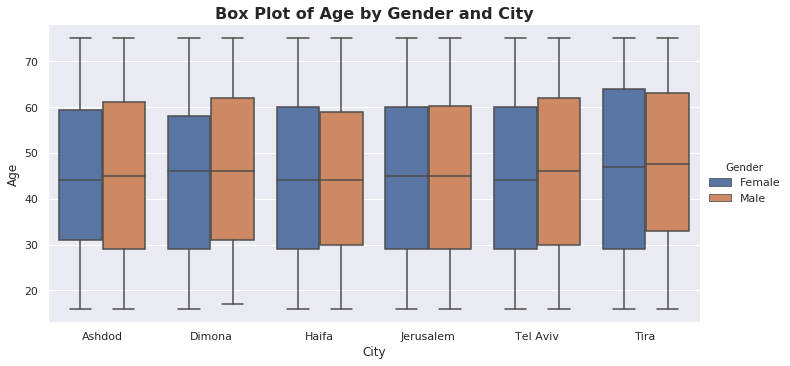

In [0]:
# Box Plotting
sns.catplot(x='City', y='Age', data=Customers, kind='box', hue='Gender', aspect=2)
plt.title('Box Plot of Age by Gender and City', weight='bold', fontsize=16)
plt.show()

In [0]:
  #converting Gender feature to a new feature called Gender where female=1 and male=0.
  Customers['Gender'] = Customers['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)


In [0]:
#Encode cities
Customers['City'] = Customers['City'].cat.codes


In [0]:
Customers.head()

,ID,Age,Gender,City,Keypls,Meshlem_polisa_IND
0,300600900,39,0,4,2198,0
1,300600901,44,0,3,1152,0
2,300600902,43,1,4,4990,0
3,300600903,57,1,3,1543,0
4,300600904,21,0,0,3704,0


Work On Polisot Table

In [0]:
Tviot.head(5)

,Keypls,Tvia_number,Tvia_date
0,1002,4,2016-11-11
1,1004,16,2016-11-29
2,1020,400,2016-05-02
3,1033,1089,2016-07-08
4,1046,2116,2016-06-24


In [0]:
#create feature of has_Tvia
Tviot['has_Tvia'] = 0
Tviot.loc[Tviot['Tvia_number'] > 0, 'has_Tvia'] = 1 
Tviot.head(5)

,Keypls,Tvia_number,Tvia_date,has_Tvia
0,1002,4,2016-11-11,1
1,1004,16,2016-11-29,1
2,1020,400,2016-05-02,1
3,1033,1089,2016-07-08,1
4,1046,2116,2016-06-24,1


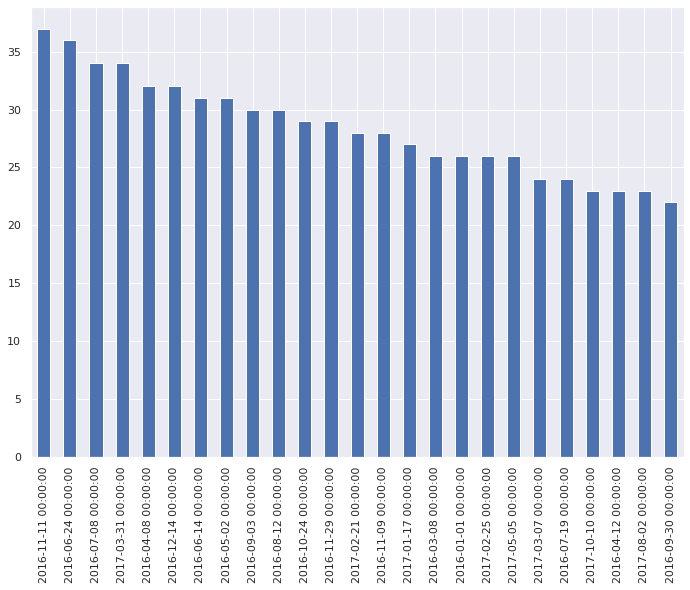

In [0]:
#plot 8:
Tviot['Tvia_date'].value_counts().plot(kind='bar')


Work On Polisot df

Text(0.5, 1.0, 'Rechecv_Companny Distribution')

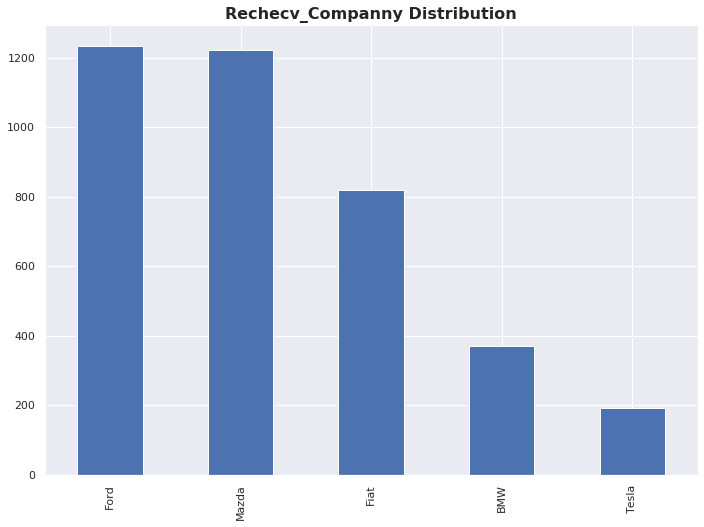

In [0]:
#plot 9:
Polisot['Rechecv_Companny'].value_counts().plot(kind='bar')
plt.title('Rechecv_Companny Distribution', weight='bold', fontsize=16)

Text(0.5, 1.0, 'Manufacture_Year Distribution')

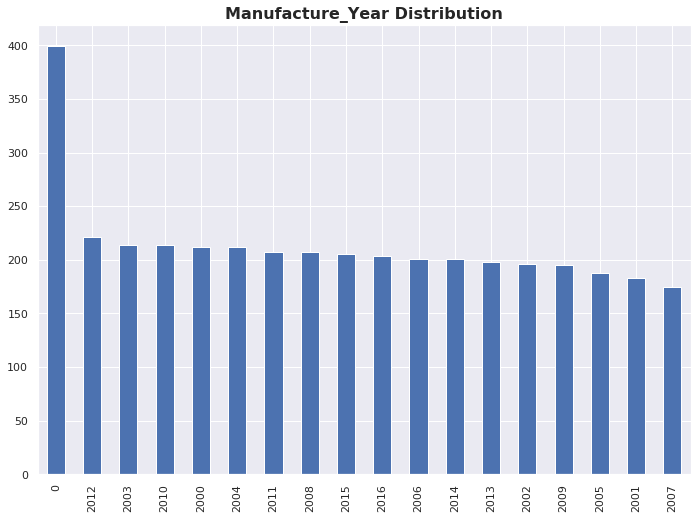

In [0]:
#plot 10:
Polisot['Manufacture_Year'].value_counts().plot(kind='bar')
plt.title('Manufacture_Year Distribution', weight='bold', fontsize=16)

In [0]:
#remove rows with 0 on year
Polisot = Polisot[Polisot.Manufacture_Year != 0]
Polisot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3433 entries, 1 to 4000
Data columns (total 6 columns):
Keypls              3433 non-null int64
Rishuy_number       3433 non-null int64
Rechecv_Companny    3433 non-null category
Manufacture_Year    3433 non-null int64
Start_date          3433 non-null datetime64[ns]
End_date            3433 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(3)
memory usage: 164.5 KB


In [0]:
#Encode Rechecv_Companny    
Polisot['Rechecv_Companny'] = Polisot['Rechecv_Companny'].astype('category')
Polisot['Rechecv_Companny'] = Polisot['Rechecv_Companny'].cat.codes

#Encode Year
Polisot['Manufacture_Year'] = Polisot['Manufacture_Year']-2000

#create new feature
Polisot['Company*year'] = Polisot.Manufacture_Year * Polisot.Rechecv_Companny

#create Time feature
Polisot['Time']=Polisot['End_date']-Polisot['Start_date']



In [0]:
#Convert Date Time:
Polisot['Start_Year'] = Polisot['Start_date'].dt.year
Polisot['Start_Month'] = Polisot['Start_date'].dt.month
Polisot['Start_Day'] = Polisot['Start_date'].dt.day
Polisot['End_Year'] = Polisot['End_date'].dt.year
Polisot['End_Month'] = Polisot['End_date'].dt.month
Polisot['End_Day'] = Polisot['End_date'].dt.day

#drop old columns
Polisot=Polisot.drop(['Start_date'], axis=1)
Polisot=Polisot.drop(['End_date'], axis=1)
  

In [0]:
Polisot.head(5)

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Company*year,Time,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day
1,1001,73002501,1,6,6,365 days,2016,4,8,2017,4,8
2,1002,73002502,3,0,0,365 days,2016,11,11,2017,11,11
3,1003,73002503,3,10,30,365 days,2016,4,8,2017,4,8
4,1004,73002504,1,8,8,365 days,2016,1,1,2016,12,31
5,1005,73002505,3,6,18,243 days,2016,1,1,2016,8,31


Lets do some SQL

In [0]:
#inner join with cust.+Polisot
merged_data = pd.merge(Customers, Polisot, on='Keypls')
merged_data.head(5)

,ID,Age,Gender,City,Keypls,Meshlem_polisa_IND,Rishuy_number,Rechecv_Companny,Manufacture_Year,Company*year,Time,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day
0,300600900,39,0,4,2198,0,73003698,3,8,24,365 days,2016,1,1,2016,12,31
1,300602108,22,0,4,2198,0,73003698,3,8,24,365 days,2016,1,1,2016,12,31
2,300603996,31,1,4,2198,0,73003698,3,8,24,365 days,2016,1,1,2016,12,31
3,300606163,19,1,4,2198,1,73003698,3,8,24,365 days,2016,1,1,2016,12,31
4,300600901,44,0,3,1152,0,73002652,2,3,6,365 days,2016,4,8,2017,4,8


In [0]:
#left join with Tviot
full_data = pd.merge(merged_data, Tviot, on='Keypls', how='left')

In [0]:
#convert NA to 0
full_data['has_Tvia'].fillna(0, inplace=True)

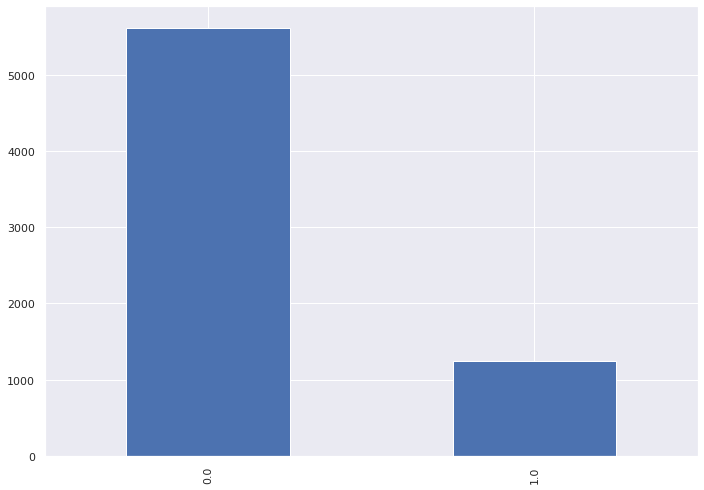

In [0]:
#Tviot Visualiztion
full_data['has_Tvia'].value_counts().plot(kind='bar')
plt.title('Tvia by ploicies', weight='bold', fontsize=16)

In [0]:
#remove unsed cols
full_data=full_data.drop(['Tvia_date', 'Tvia_number'], axis=1)
full_data=full_data.drop(['ID', 'Rishuy_number','Keypls'], axis=1)

full_data.head(4)

,ID,Age,Gender,City,Keypls,Meshlem_polisa_IND,Rishuy_number,Rechecv_Companny,Manufacture_Year,Company*year,Time,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day,has_Tvia
0,300600900,39,0,4,2198,0,73003698,3,8,24,365 days,2016,1,1,2016,12,31,1.0
1,300602108,22,0,4,2198,0,73003698,3,8,24,365 days,2016,1,1,2016,12,31,1.0
2,300603996,31,1,4,2198,0,73003698,3,8,24,365 days,2016,1,1,2016,12,31,1.0
3,300606163,19,1,4,2198,1,73003698,3,8,24,365 days,2016,1,1,2016,12,31,1.0


In [0]:
#create feature of Vetek for customers

full_data['Time'] = full_data['Time'].astype('int64')

full_data['Vetek'] = 0
full_data.loc[full_data['Time'] > 364, 'Vetek'] = 1 
full_data=full_data.drop(['Time'], axis=1)

full_data.head(5)

,Age,Gender,City,Meshlem_polisa_IND,Rechecv_Companny,Manufacture_Year,Company*year,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day,has_Tvia,Vetek
0,39,0,4,0,3,8,24,2016,1,1,2016,12,31,1.0,1
1,22,0,4,0,3,8,24,2016,1,1,2016,12,31,1.0,1
2,31,1,4,0,3,8,24,2016,1,1,2016,12,31,1.0,1
3,19,1,4,1,3,8,24,2016,1,1,2016,12,31,1.0,1
4,44,0,3,0,2,3,6,2016,4,8,2017,4,8,0.0,1


Modeling and Evaluation

In [0]:
#split to train test data
from sklearn.model_selection import train_test_split
X = full_data.drop("has_Tvia", axis=1)
Y = full_data["has_Tvia"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=25)

X_train.shape, y_train.shape, X_test.shape

((4806, 14), (4806,), (2060, 14))

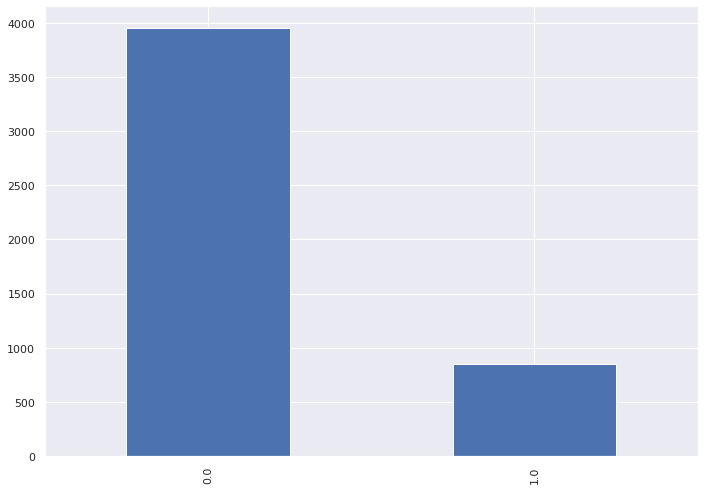

In [0]:
#lets look about the split-Y train
y_train.value_counts().plot(kind='bar')

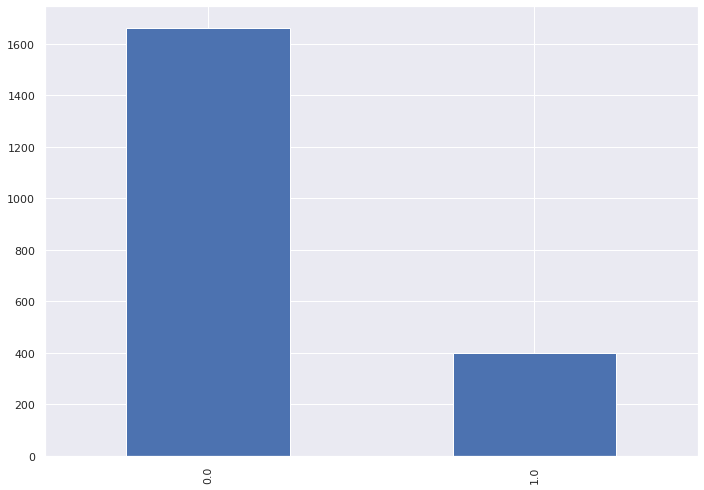

In [0]:
#lets look about the split-Y test
y_test.value_counts().plot(kind='bar')

Modeling- our y is binary, so we need to use algoritmes that knows how to handle with binary classification

In [0]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

82.27

In [0]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


82.29

In [0]:
#lets look at the coeff
coeff_df = pd.DataFrame(full_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Start_Day,3.631123e-02
7,Start_Month,1.742094e-03
12,has_Tvia,1.195275e-03
13,Vetek,8.641341e-07
10,End_Month,-1.972024e-03
0,Gender,-7.450900e-03
6,Start_Year,-9.528752e-03
11,End_Day,-9.575973e-03
1,City,-9.984194e-03
9,End_Year,-2.568104e-02


In [0]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


89.24

In [0]:
#knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

87.64

In [0]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

82.27

In [0]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

99.88

In [0]:
models = pd.DataFrame({
    'Model': ['Naive Bayes','Logistic Regression','Support Vector Machines', 'KNN',  
              'Stochastic Gradient Decent','Random Forest'],
    'Score': [acc_gaussian,acc_log,  acc_svc, acc_knn, 
              acc_sgd,acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Random Forest,99.88
2,Support Vector Machines,89.24
3,KNN,87.64
1,Logistic Regression,82.29
0,Naive Bayes,82.27
4,Stochastic Gradient Decent,82.27


I chose models that can handle with binary classification and the results are very interesting we see that RF has the best score but we need to double check for overfitting.

If I will have more time I will try to tune the hyperpararmeters of the model and to see which features affects on the decision.
 
Thank you for the exam.
I hope to hear from you soon.